# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q="

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

# Log file print statement
print(f"End Data Retrieval")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 0 | Byron Bay
Processing Record 1 | Rikitea
Processing Record 2 | Faanui
Processing Record 3 | Sinnamary
Processing Record 4 | Avarua
Processing Record 5 | Punta Arenas
Processing Record 6 | Pevek
Processing Record 7 | Walvis Bay
Processing Record 8 | Nikolskoye
Processing Record 9 | Paamiut
Processing Record 10 | Bamako
City not found. Skipping...
Processing Record 11 | Grand Gaube
Processing Record 12 | Clyde River
Processing Record 13 | Keflavik
Processing Record 14 | Albany
Processing Record 15 | San Clemente
Processing Record 16 | Safford
Processing Record 17 | Merrill
Processing Record 18 | Ushuaia
Processing Record 19 | Tura
Processing Record 20 | Porbandar
Processing Record 21 | Ponta do Sol
Processing Record 22 | Barrow
Processing Record 23 | Busselton
Processing Record 24 | Ust-Omchug
City not found. Skipping...
Processing Record 25 | Boulder
Processing Record 26 | Husavik
Processing Record 27 | Touros

Processing Record 227 | Labytnangi
Processing Record 228 | Constitucion
Processing Record 229 | San Cristobal
City not found. Skipping...
Processing Record 230 | Natchitoches
Processing Record 231 | Inza
Processing Record 232 | Yulara
Processing Record 233 | Emba
Processing Record 234 | Korsakov
Processing Record 235 | Tikaitnagar
Processing Record 236 | Port Keats
Processing Record 237 | Iwaki
Processing Record 238 | Alghero
Processing Record 239 | Zhigansk
Processing Record 240 | Pilar do Sul
Processing Record 241 | Waslala
Processing Record 242 | Gat
Processing Record 243 | Barkhan
Processing Record 244 | Cabra
Processing Record 245 | Wahiawa
Processing Record 246 | Sao Gabriel da Cachoeira
Processing Record 247 | Namatanai
Processing Record 248 | Bose
City not found. Skipping...
Processing Record 249 | Atambua
Processing Record 250 | Yeppoon
Processing Record 251 | Haines Junction
Processing Record 252 | Santa Rita
Processing Record 253 | Itaituba
Processing Record 254 | Sovetskiy


Processing Record 459 | Chernyshevskiy
Processing Record 460 | Harper
Processing Record 461 | Pachino
Processing Record 462 | Havoysund
Processing Record 463 | Necochea
Processing Record 464 | Egvekinot
Processing Record 465 | Maxixe
Processing Record 466 | Bosaso
Processing Record 467 | Darnah
Processing Record 468 | Lincoln
Processing Record 469 | Palmas
Processing Record 470 | Half Moon Bay
Processing Record 471 | Naze
Processing Record 472 | Vicosa
Processing Record 473 | Roswell
Processing Record 474 | Miraflores
Processing Record 475 | Canoa
City not found. Skipping...
Processing Record 476 | Cap Malheureux
Processing Record 477 | Robstown
Processing Record 478 | Matehuala
Processing Record 479 | Gorontalo
Processing Record 480 | Pizarro
Processing Record 481 | Chitungwiza
Processing Record 482 | Coihueco
Processing Record 483 | Kysyl-Syr
Processing Record 484 | Zaysan
Processing Record 485 | Launceston
Processing Record 486 | Bridlington
Processing Record 487 | Yago
Processing R

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Byron Bay,75,AU,1570317878,64,-28.65,153.62,297.040,1.50
1,Rikitea,100,PF,1570317880,79,-23.12,-134.97,294.923,9.36
2,Faanui,60,PF,1570317881,74,-16.48,-151.75,299.583,5.29
3,Sinnamary,0,GF,1570317882,79,5.38,-52.96,300.843,5.96
4,Avarua,100,CK,1570317862,49,-21.21,-159.78,296.150,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

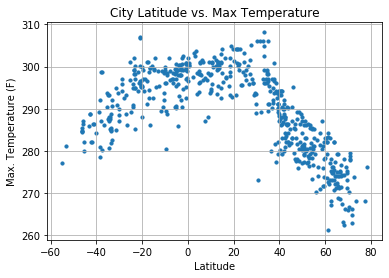

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

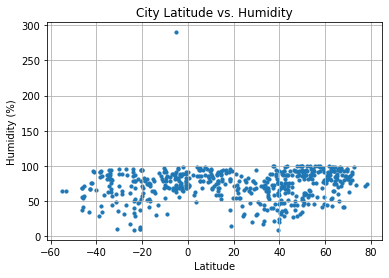

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

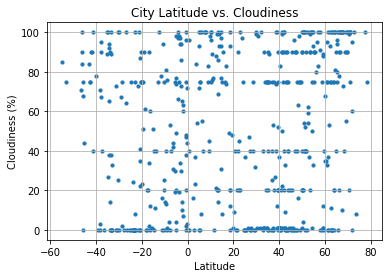

In [10]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

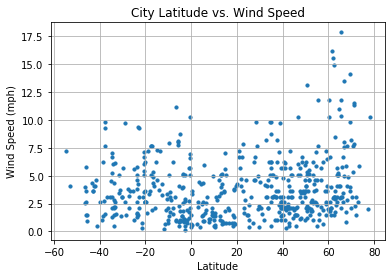

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()